# Import the survey data

This includes the class answers to the user experience questions, including their self-reported progress through the game.

In [ ]:
import requests
import csv
import numpy as np

# URL of the CSV file in Google Drive
url = 'https://drive.google.com/uc?id=1nY4vBq9QkfQ9bM7Zo71i0nvN-c7SLtY_'

# Download the CSV file
response = requests.get(url)
data = response.text.splitlines()

# Parse CSV data
reader = csv.reader(data)
rows = list(reader)

# Extract the numerical data (rest of the rows)
numerical_data = np.array(rows[1:], dtype=int)

# Shorthand labels of what each question asks
labels = ['gamer','reasoning','intuition','guessed','nervous','frustrated','motivated','gradual','sudden','understand','progress']

# Compare average responses in first and second phase of game play

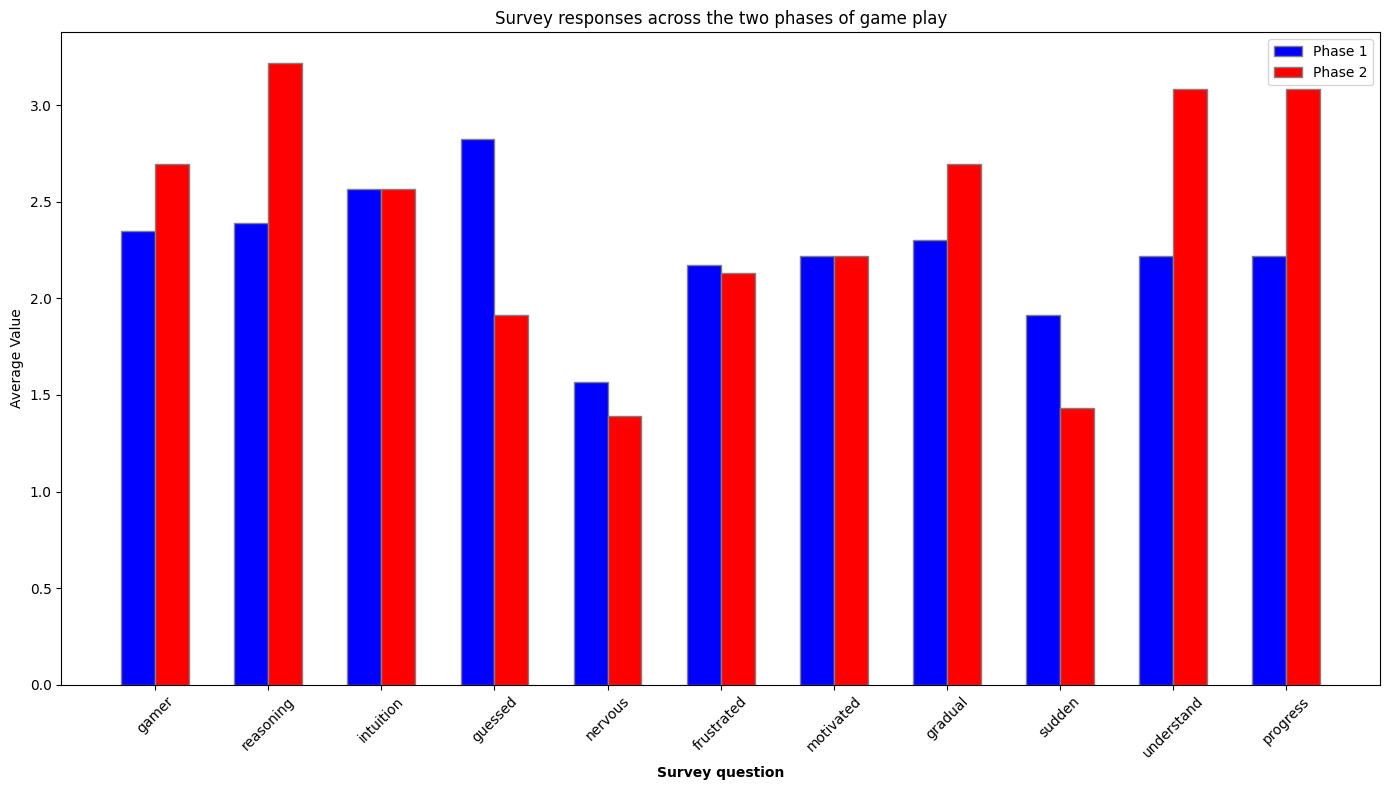

In [ ]:
import matplotlib.pyplot as plt

non_observers = numerical_data[numerical_data[:,2]<2,6:]

barWidth = 0.3 # Set the width of each bar

plt.figure(figsize=(14, 8)) # Initialize the plot

avg_A = np.mean(non_observers[:,:11], axis=0) #phase 1 responses
avg_B = np.mean(non_observers[:,11:], axis=0) #phase 2 responses

# Loop through each pair of averages and labels
for i, (avg_a, avg_b, label) in enumerate(zip(avg_A, avg_B, labels)):
    plt.bar(i, [avg_a], color='b', width=barWidth, edgecolor='grey', label='Phase 1' if i == 0 else "")
    plt.bar(i+barWidth, [avg_b], color='r', width=barWidth, edgecolor='grey', label='Phase 2' if i == 0 else "")

# Add xticks on the middle of the group bars
plt.xlabel('Survey question', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(0, len(labels))], labels, rotation=45)

# Create legend & Show graphic
plt.ylabel('Average Value')
plt.title('Survey responses across the two phases of game play')
plt.legend()
plt.tight_layout()
plt.show()


#Compare survey responses between observed and unobserved players

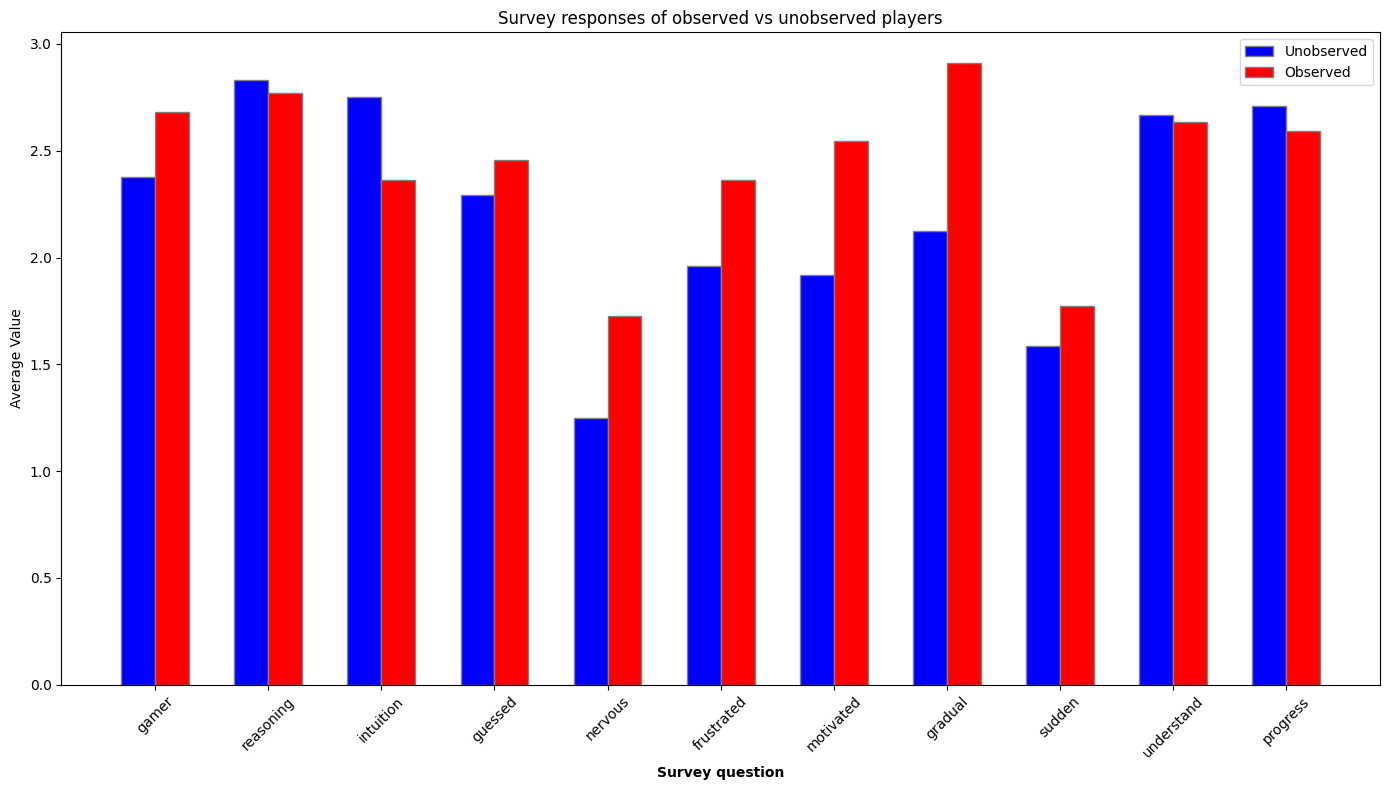

In [ ]:
import matplotlib.pyplot as plt

non_observers = numerical_data[numerical_data[:,2]<2,6:]

barWidth = 0.3 # Set the width of each bar

plt.figure(figsize=(14, 8)) # Initialize the plot

avg_A = np.mean(numerical_data[numerical_data[:,2]==0,6:], axis=0)
avg_B = np.mean(numerical_data[numerical_data[:,2]==1,6:], axis=0)
avg_A = (avg_A[:11]+avg_A[11:])/2
avg_B = (avg_B[:11]+avg_B[11:])/2

# Loop through each pair of averages and labels
for i, (avg_a, avg_b, label) in enumerate(zip(avg_A, avg_B, labels)):
    plt.bar(i, [avg_a], color='b', width=barWidth, edgecolor='grey', label='Unobserved' if i == 0 else "")
    plt.bar(i+barWidth, [avg_b], color='r', width=barWidth, edgecolor='grey', label='Observed' if i == 0 else "")

# Add xticks on the middle of the group bars
plt.xlabel('Survey question', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(0, len(labels))], labels, rotation=45)

# Create legend & Show graphic
plt.ylabel('Average Value')
plt.title('Survey responses of observed vs unobserved players')
plt.legend()
plt.tight_layout()
plt.show()

#Look at correlation between survey responses and progress in game

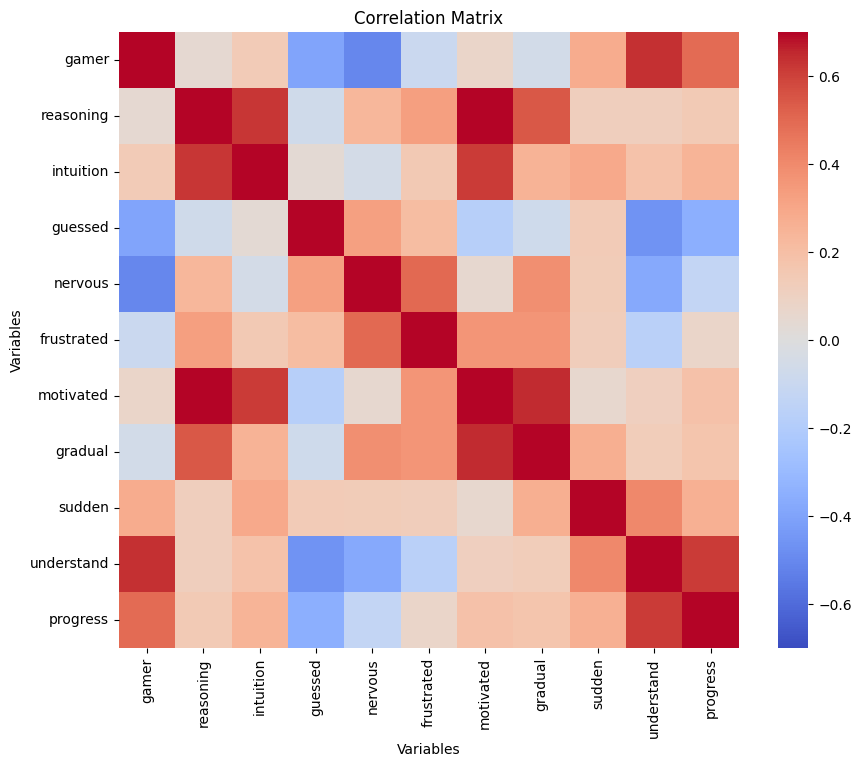

In [ ]:
import seaborn as sns

survey_data = non_observers[:,:11]+non_observers[:,11:]
corr_matrix = np.corrcoef(survey_data, rowvar=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False,fmt=".2f", cmap='coolwarm', xticklabels=labels, yticklabels=labels, vmin=-.7, vmax=.7)

# Add labels and title for clarity
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

# Look at correlation between ratings of observer and observed players.

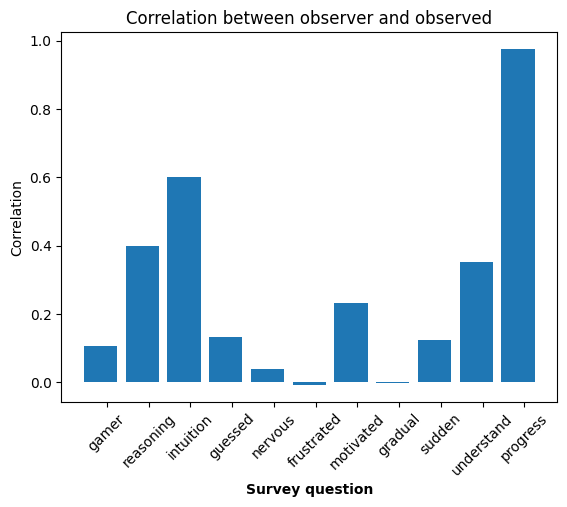

In [ ]:

sorted_indices = np.argsort(numerical_data[numerical_data[:,2]==1,1])
observed = numerical_data[numerical_data[:,2]==1,6:]
observed = observed[sorted_indices]

sorted_indices = np.argsort(numerical_data[numerical_data[:,2]==2,1])
observer = numerical_data[numerical_data[:,2]==2,6:]
observer = observer[sorted_indices]

observed = (observed[:,:11]+observed[:,11:])/2
observer = (observer[:,:11]+observer[:,11:])/2

combined_matrix = np.hstack((observer,observed))

corr_matrix = np.corrcoef(combined_matrix, rowvar=False)
corr_matrix = np.diag(corr_matrix, k=observer.shape[1])
plt.bar(np.arange(corr_matrix.size),corr_matrix);

# Add xticks on the middle of the group bars
plt.xlabel('Survey question', fontweight='bold');
plt.xticks([r + barWidth / 2 for r in range(0, len(labels))], labels, rotation=45);

# Add labels and title for clarity
plt.title('Correlation between observer and observed');
plt.xlabel('Survey question');
plt.ylabel('Correlation');